<h3 style="background-color:#73257F; font-size:250%; text-align:center; font-family:Georgia; color:white">Importing Libraries</h3> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h3 style="background-color:#73257F; font-size:250%; text-align:center; font-family:Georgia; color:white"> Understanding Data</h3> 

In [ ]:
df = pd.read_csv("insurance_data.csv")
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [3]:
df.head(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [4]:
df.shape

(1340, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


<h3 style="background-color:#73257F; font-size:250%; text-align:center; font-family:Georgia; color:white"> Data Cleaning</h3> 

In [6]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [7]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [8]:
df['age'] = df['age'].fillna(int(df['age'].mean()))
df['region'] = df['region'].fillna(df['region'].mode())
df = df.drop(['index', 'PatientID'], axis = 1)

<h3 style="background-color:#73257F; font-size:250%; text-align:center; font-family:Georgia; color:white"> Feature Engineering</h3> 

In [9]:
def age_category(age):
    if age < 35:
        return 'young adult'
    else:
        return 'adult'

df['age_group'] = df['age'].apply(age_category)

In [10]:
def bmi_category(bmi):
    if bmi < 18:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
    
df['bmi_category'] = df['bmi'].apply(bmi_category)

<h3 style="background-color:#73257F; font-size:250%; text-align:center; font-family:Georgia; color:white"> Data Visualization</h3> 

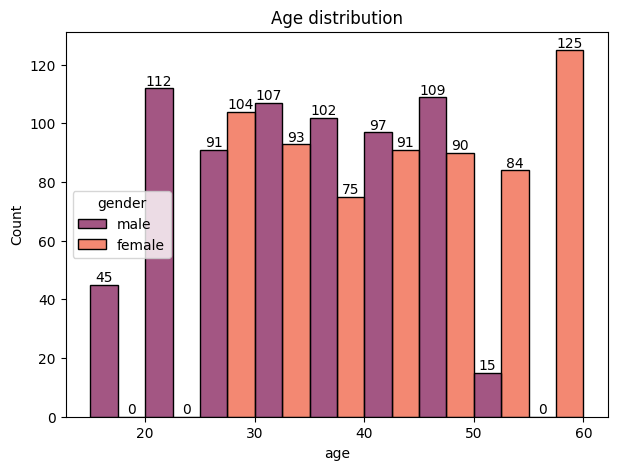

In [ ]:
plt.figure(figsize = (7, 5))
ax = sns.histplot(data = df, x = 'age', binrange = (15, 60), binwidth = 5, hue = 'gender', multiple = 'dodge', palette = 'rocket')
plt.title('Age distribution')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

##### **Insight:**
- There are no insurance claims from individuals above the age of 60.
- Fewer men claim insurance below the age of 30 and above the age of 50.


Text(0.5, 1.0, 'Age group Distributions')

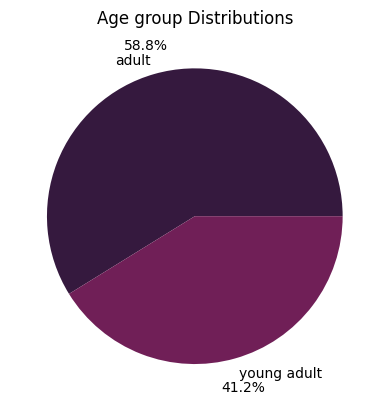

In [ ]:
group1 = df['age_group'].value_counts().reset_index()
plt.pie(group1['count'], labels = group1['age_group'], autopct = '%1.1f%%', pctdistance = 1.2, colors = sns.color_palette('rocket'))
plt.title('Age group Distributions')

##### **Insight:**
- Insurance claims are slightly higher in adults then young adults.


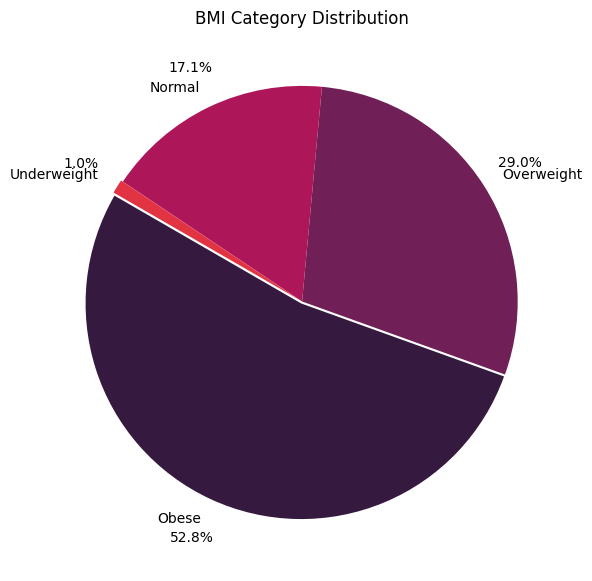

In [ ]:
bmi_category_count = df['bmi_category'].value_counts()

plt.figure(figsize = (10, 7))
plt.pie(bmi_category_count, labels = bmi_category_count.index, autopct = '%.1f%%', explode = [0.01, 0, 0, 0.01],
        pctdistance = 1.2, labeldistance = 1.1, colors = sns.color_palette('rocket'), startangle = 150)
plt.title('BMI Category Distribution')
plt.show()

##### **Insight:**
- There are more obese patients who claimed insurance than others.
- 81.8% of patient are overweight or obese.

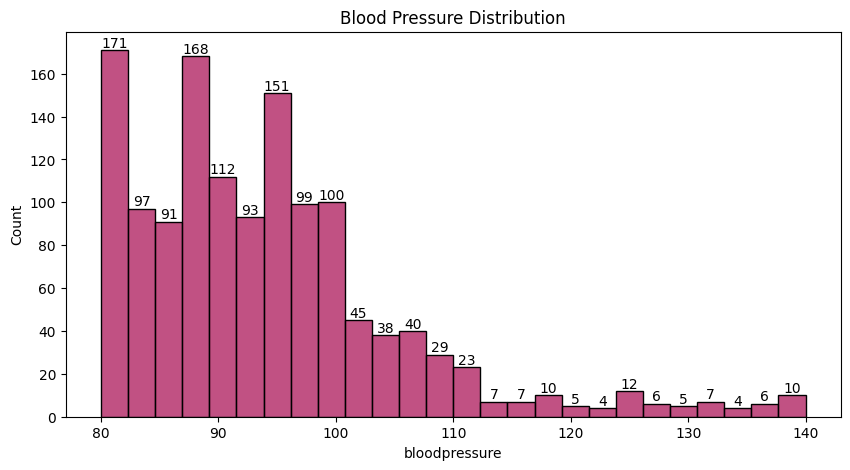

In [ ]:
color = sns.color_palette('rocket')[2]
plt.figure(figsize = (10, 5))
ax = sns.histplot(data = df, x = 'bloodpressure', color = color)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Blood Pressure Distribution')
plt.show()

##### **Insight:**
Most of the insurance holders have normal blood pressure.

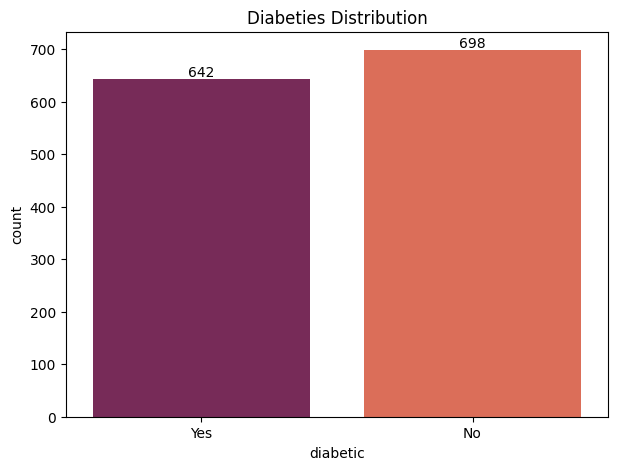

In [ ]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(data = df, x = 'diabetic', palette = 'rocket')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Diabeties Distribution')
plt.show()


##### **Insight:**
Out of 1,340 individuals who claimed insurance, 637 are diabetic, representing 47%.

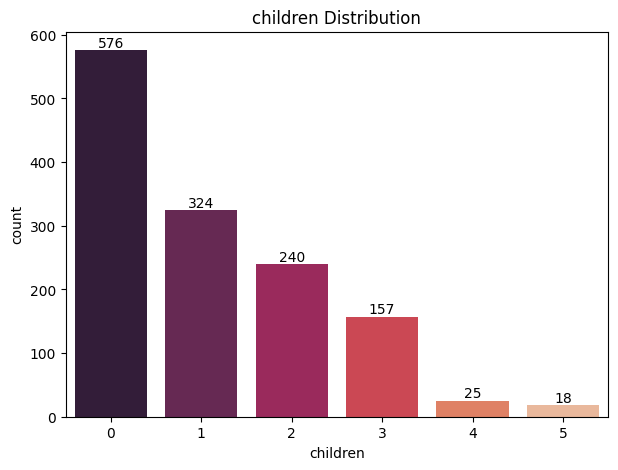

In [ ]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(data = df, x = 'children', palette  = 'rocket')
for container in ax.containers:
    ax.bar_label(container)
plt.title('children Distribution')
plt.show()

##### **Insights:**
84.4% of individuals who claimed insurance have fewer than three children or no children.

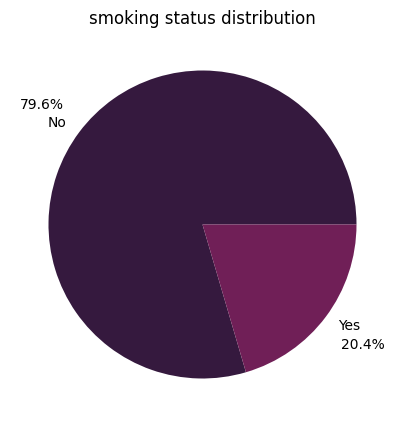

In [ ]:
smoker_category_count = df['smoker'].value_counts()

plt.figure(figsize = (6, 5))
plt.pie(smoker_category_count, labels = smoker_category_count.index, autopct = '%.1f%%',
        pctdistance = 1.3, colors = sns.color_palette('rocket'))
plt.title('smoking status distribution')
plt.show()

##### **Insight:**
20.4% individuals who claimed insurance are smokers.

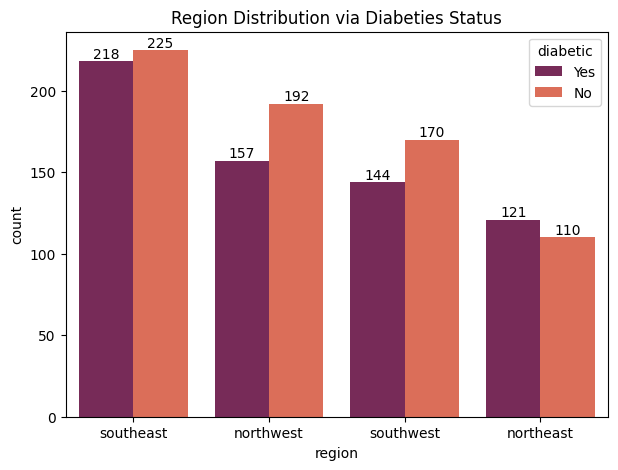

In [ ]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(data = df, x = 'region', hue = 'diabetic', palette = 'rocket')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Region Distribution via Diabeties Status')
plt.show()

##### **Insight:**
- The Southeast region has higher insurance claims than other regions.
- The Northeast has more diabetic patients than non-diabetic patients.

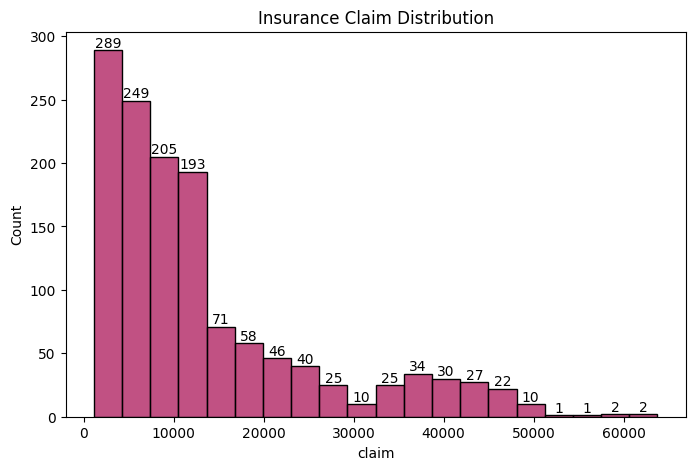

In [ ]:
plt.figure(figsize = (8, 5))
ax = sns.histplot(data = df, x = 'claim', bins = 20, color = color)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Insurance Claim Distribution')
plt.show()

##### **Insight:**
Most individuals claimed amount between 1000 and 20000.

### Bivariate Analysis

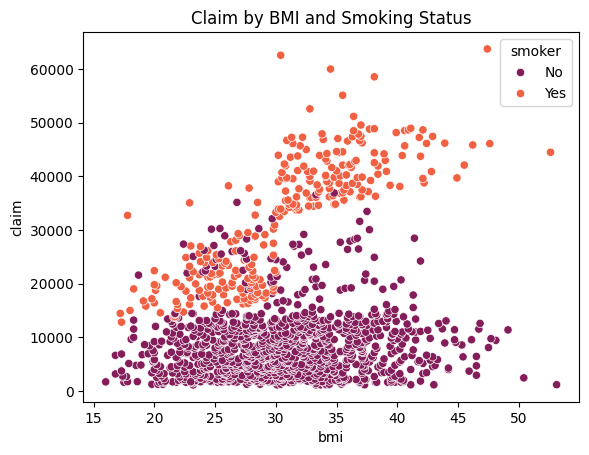

In [117]:
sns.scatterplot(data = df, x = 'bmi', y = 'claim', hue = 'smoker', palette = 'rocket')
plt.title('Claim by BMI and Smoking Status')
plt.show()

##### **Insight:**
Insurance claims increase with BMI for smokers, whereas non-smoker claims stay relatively constant regardless of BMI.



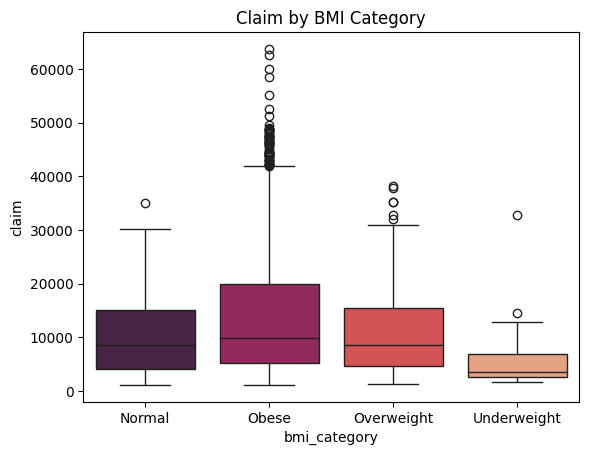

In [118]:
sns.boxplot(data = df, x = 'bmi_category', y = 'claim', palette = 'rocket')
plt.title('Claim by BMI Category')
plt.show()

##### **Insight:**
Obese individuals receive higher insurance claims compared to others.

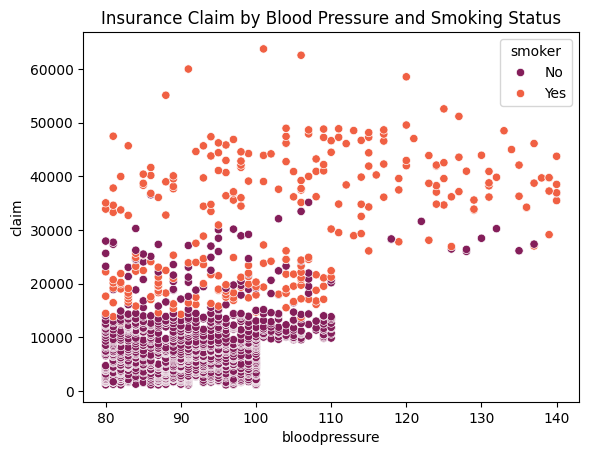

In [119]:
sns.scatterplot(data = df, x = 'bloodpressure', y = 'claim', hue = 'smoker', palette = 'rocket')
plt.title('Insurance Claim by Blood Pressure and Smoking Status')
plt.show()

##### **Insight:**
Individuals with blood pressure above 110 receive insurance claims above 25,000, while claims for those with lower blood pressure may depend on other factors like smoking status.

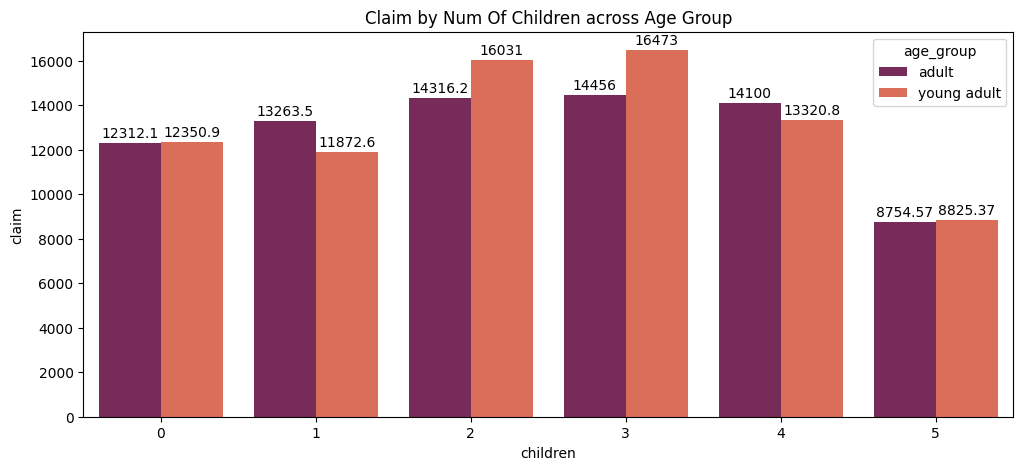

In [ ]:
plt.figure(figsize = (12, 5))
ax = sns.barplot(data = df, x = 'children' , y = 'claim', hue = 'age_group', errorbar = None, palette = 'rocket')
for container in ax.containers:
    ax.bar_label(container, padding = 2, label_type = 'edge')
plt.title('Claim by Num Of Children across Age Group')
plt.show()

##### **Insight:**
Individuals with 2 or 3 children receive the highest insurance claims, around 144,300 to 144,500 for 
adults and 16,000 to 16,500 for young adults, with claims for those with 3 children being slightly higher.

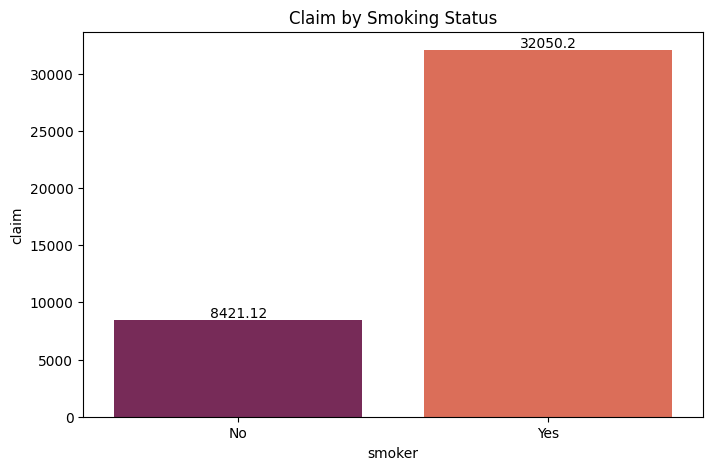

In [ ]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = df, x = 'smoker' , y = 'claim', errorbar = None, palette = 'rocket')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Claim by Smoking Status')
plt.show()

##### **Insight:**
Smokers have higher insurance claims than non-smokers, averaging around 32K.

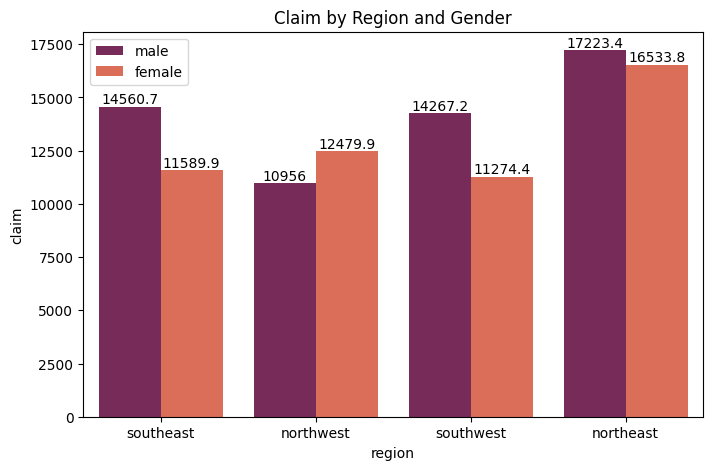

In [ ]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = df, x = 'region' , y = 'claim', errorbar = None, hue = 'gender', palette = 'rocket')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc = 'best')
plt.title('Claim by Region and Gender')
plt.show()

##### **Insight:**
The Northeast region records the highest average insurance claim at around 16K for male and 17k for female.